In [1]:
from dpll import dpll
from compiler import compile_model
import matplotlib.pyplot as plt
from visualization import Visualization
from sops import indices, ones, OneHotTokEmb
from sop_utils import sop_generate

test_id = 5
sample_inputs = [
    "[BOS] 1 -2 3 0 -1 2 -3 0 2 4 -1 0 1 -3 4 0 -2 -3 -4 0 3 -4 -1 0 -2 4 -1 0 [SEP] D 1 [UP] D 1 D 2 [UP] D 1 D 2 4 -3 [BT] D 1 -2 -3 4 [BT] -1 D 2 [UP] -1 D 2 3 4 [BT] -1 -2 D 3 [UP] -1 -2 D 3 4 SAT",
    "[BOS] 6 -7 -5 0 -4 -8 9 0 -1 -8 2 0 -3 6 1 0 5 -9 -10 0 -7 -1 9 0 -4 -6 10 0 -4 -8 7 0 -7 -2 -8 0 3 6 1 0 8 1 3 0 6 3 7 0 3 9 7 0 3 -9 -5 0 -1 3 2 0 5 3 -6 0 -10 7 4 0 8 -9 -10 0 1 -4 5 0 -2 10 7 0 -10 5 -2 0 -8 10 -7 0 -4 -5 -1 0 -10 -7 6 0 10 7 -1 0 -3 -6 7 0 4 6 -9 0 -9 -10 7 0 -7 -10 8 0 5 4 -2 0 -1 -3 4 0 -3 -8 1 0 7 9 10 0 4 3 2 0 10 2 3 0 9 -4 8 0 9 5 2 0 1 -2 -8 0 8 9 -1 0 1 -10 4 0 5 2 -1 0 [SEP] D 7 [UP] D 7 D 1 [UP] D 7 D 1 9 D 6 [UP] D 7 D 1 9 D 6 D 5 [UP] D 7 D 1 9 D 6 D 5 3 -4 [BT] D 7 D 1 9 D 6 -5 -10 -4 3 [BT] D 7 D 1 9 -6 -5 -10 -8 4 2 SAT",
    "[BOS] 6 -8 10 0 2 -6 -7 0 8 -7 3 0 -3 1 -2 0 -2 -10 4 0 1 -6 -2 0 -8 4 -9 0 1 10 -5 0 8 4 5 0 -7 -6 -4 0 6 3 10 0 1 7 -10 0 1 6 -3 0 7 10 -9 0 -2 1 4 0 -7 -9 4 0 9 6 -3 0 4 -2 -9 0 3 8 -1 0 -1 5 -3 0 -2 -3 -7 0 4 -2 8 0 -6 -9 -10 0 4 5 10 0 -7 3 -2 0 -6 7 4 0 -8 -1 -10 0 -7 8 10 0 -9 -7 -1 0 -6 -2 5 0 -6 5 -3 0 -6 -4 9 0 9 -10 7 0 8 -3 -7 0 7 -10 -5 0 1 2 -4 0 4 -8 3 0 8 -3 6 0 -8 -2 1 0 6 -3 -10 0 -1 -6 -2 0 6 -4 2 0 10 3 6 0 [SEP] D 8 [UP] D 8 D -4 [UP] D 8 D -4 -9 3 6 7 2 [BT] D 8 4 D -6 [UP] D 8 4 D -6 10 -1 7 -3 -2 [BT] D 8 4 6 -7 9 10 [BT] -8 D 2 [UP] -8 D 2 4 D -7 [UP] -8 D 2 4 D -7 D -5 [UP] -8 D 2 4 D -7 D -5 -6 -3 10 1 [BT] -8 D 2 4 D -7 5 -10 1 -9 3 6 [BT] -8 D 2 4 7 3 [BT] -8 -2 D 3 [UP] -8 -2 D 3 -7 6 4 5 9 10 [BT] -8 -2 -3 -7 -1 -10 -5 4 UNSAT",
    "[BOS] 1 9 -5 0 3 6 -8 0 1 -7 4 0 5 -9 -1 0 -3 -7 -1 0 -6 -2 -3 0 6 2 3 0 -7 -6 5 0 -6 -9 7 0 3 5 -8 0 9 4 -6 0 -1 -4 -8 0 2 1 7 0 9 4 7 0 5 7 8 0 5 -1 -7 0 7 2 3 0 5 2 -7 0 3 -5 4 0 8 -7 -4 0 9 3 1 0 8 -5 7 0 3 9 -6 0 4 9 2 0 4 1 -2 0 -3 9 -4 0 -9 -6 -8 0 3 8 2 0 5 -7 4 0 -5 3 -8 0 -8 1 -4 0 -7 2 4 0 9 -6 1 0 9 -1 5 0 8 -1 -9 0 9 4 5 0 7 1 -5 0 -6 -1 -2 0 -1 -9 3 0 [SEP] D 1 [UP] D 1 D 2 [UP] D 1 D 2 -6 D 3 [UP] D 1 D 2 -6 D 3 -7 D 4 [UP] D 1 D 2 -6 D 3 -7 D 4 9 5 8 [BT] D 1 D 2 -6 D 3 -7 -4 9 5 8 SAT",
    "[BOS] 4 -10 -9 0 -11 -2 5 0 13 5 -1 0 -11 -14 2 0 15 -13 -11 0 -5 -11 -1 0 -3 -1 12 0 13 8 5 0 11 -12 -2 0 5 10 -1 0 5 -1 -15 0 11 6 -1 0 6 5 -4 0 -11 5 -7 0 -8 -3 -7 0 9 -15 -11 0 -11 -13 15 0 -7 4 6 0 2 -10 -14 0 8 12 -6 0 -7 -15 -10 0 -13 7 10 0 7 15 -4 0 7 -4 9 0 -4 6 2 0 15 4 1 0 15 -6 -7 0 8 5 -6 0 -3 -6 -2 0 -4 11 -2 0 2 9 -8 0 -12 -11 -5 0 -11 -6 14 0 -2 -6 -10 0 -3 -4 -11 0 6 -9 15 0 -12 -5 15 0 -4 9 -3 0 -4 2 13 0 -2 -12 8 0 -5 -12 15 0 15 7 6 0 -3 5 -2 0 2 -4 -13 0 -3 -15 -11 0 15 -4 -9 0 -3 8 -11 0 13 -1 14 0 -10 3 7 0 8 -14 2 0 5 13 7 0 8 4 6 0 13 -4 6 0 -2 7 10 0 -12 -9 7 0 8 4 -10 0 4 -14 -12 0 -10 -13 5 0 -7 -5 3 0 5 -10 -14 0 10 -13 -11 0 -13 -6 10 0 10 11 4 0 [SEP] D 14 [UP] D 14 D 13 [UP] D 14 D 13 D 1 [UP] D 14 D 13 D 1 D 10 [UP] D 14 D 13 D 1 D 10 2 -6 11 5 [BT] D 14 D 13 D 1 -10 5 -11 6 [BT] D 14 D 13 -1 D 8 [UP] D 14 D 13 -1 D 8 D 10 [UP] D 14 D 13 -1 D 8 D 10 2 -6 5 D -11 [UP] D 14 D 13 -1 D 8 D 10 2 -6 5 D -11 -12 -4 -9 -7 15 3 SAT",
    "[BOS] -12 -9 6 0 11 14 -15 0 -3 2 -13 0 -11 6 13 0 15 -3 -14 0 6 -4 -1 0 -15 -13 11 0 2 -14 -5 0 14 15 -1 0 15 11 -8 0 12 9 6 0 -3 -2 1 0 -11 -3 8 0 -7 5 -14 0 -8 4 -15 0 1 -10 15 0 13 3 -1 0 12 -9 1 0 -2 7 14 0 3 7 -1 0 -7 2 13 0 -1 -8 13 0 7 4 13 0 6 -9 -7 0 -14 -9 -8 0 14 -11 13 0 -3 -10 1 0 6 15 -11 0 -3 -1 -10 0 -10 -9 11 0 2 13 5 0 8 -4 -12 0 -10 4 11 0 2 -13 -6 0 9 5 -15 0 8 4 -15 0 6 -15 -12 0 15 -11 10 0 5 -12 1 0 -4 -1 12 0 -7 5 11 0 9 -8 -1 0 -8 -9 4 0 -3 8 10 0 2 -5 -7 0 -13 -10 12 0 -8 5 1 0 -12 -3 -6 0 -11 -14 10 0 12 14 3 0 3 9 15 0 6 12 -15 0 9 3 -11 0 -3 13 6 0 7 1 -15 0 3 2 1 0 -12 3 11 0 -7 -1 -13 0 -10 -5 -14 0 -9 -14 1 0 5 -14 -7 0 -2 13 -5 0 14 3 -6 0 [SEP] D 1 [UP] D 1 D 13 [UP] D 1 D 13 -7 3 -10 8 2 14 15 9 [BT] D 1 -13"
]
# sample_input_unsat = "[BOS] 1 -2 3 0 -1 2 -3 0 2 4 -1 0 1 -3 4 0 -2 -3 -4 0 3 -4 -1 0 -2 4 -1 0 1 2 -3 0 1 2 3 0 [SEP]"
sample_input = sample_inputs[test_id]
prompt_str = sample_input.split("[SEP]")[0] + "[SEP]"
trace_str = sample_input.split("[SEP]")[1].strip()
prompt_tokens = prompt_str.split()
trace_tokens = trace_str.split()
full_trace_tokens = prompt_tokens + trace_tokens

context_len = len(full_trace_tokens) + 500
# num_vars = max(int(tok) for tok in full_trace_tokens if tok.isdigit())
# num_clauses = prompt_str.count("0") + 2
num_vars = 15
num_clauses = 71
context_len = 1200
sop, vocab, sop_logs = dpll(num_vars=num_vars, num_clauses=num_clauses, context_len=context_len, return_logs=True, mean_exactness=100, nonsep_penalty=100)


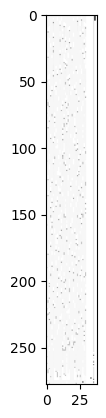

In [2]:
abstract_out = sop.abstract_eval(full_trace_tokens)
plt.imshow(abstract_out, cmap='Greys')
plt.show()

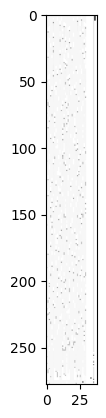

In [3]:
concrete_out = sop.concrete_eval(full_trace_tokens)
plt.imshow(concrete_out, cmap='Greys')
plt.show()

In [4]:
import numpy as np
# debugging
for name, log_sop in sop_logs.items():
    abstract_val = log_sop.abstract_eval(full_trace_tokens).squeeze()
    concrete_val = log_sop.concrete_eval(full_trace_tokens).squeeze()
    errors = np.abs(abstract_val - concrete_val)
    threshold = 0.01
    max_error = errors.max()
    if max_error > threshold:
        print(f"Large Error SOp {name}: {max_error}")

Model Hidden Size 190


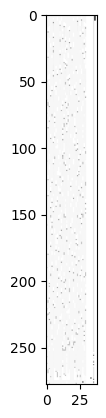

In [5]:
dpll_model, residual_alloc, flat_sop = compile_model(sop, vocab, context_len, return_alloc=True)
flattened_sops = flat_sop.all_named_deps()
name_alloc = {sop.name: residual_alloc[sop] for sop in residual_alloc.keys() if sop.name is not None}
print("Model Hidden Size", dpll_model.hidden_size)
dpll_model.summary()
out, residual_dict = dpll_model.apply_tokens(full_trace_tokens, residual_alloc=name_alloc)

model_out = out.detach().numpy()[0]
plt.imshow(model_out, cmap='Greys')

In [6]:
print(residual_alloc)
print(sorted(residual_dict.keys()))
print(sorted(flattened_sops.keys()))
print(residual_dict['r_i_pre'][0, -1])
print(flattened_sops['r_i'].concrete_eval(full_trace_tokens)[-1])
print(sop_logs['r_i'].concrete_eval(full_trace_tokens).squeeze()[-1])

{<1-D SOp None of type Indices>: (0, 1), <38-D SOp tok_emb of type OneHotTokEmb>: (1, 39), <1-D SOp None of type IsBOS>: (39, 40), <1-D SOp None of type MultSOp>: (40, 41), <1-D SOp None of type Ones>: (41, 42), <5-D SOp nearest_sep of type Mean>: (42, 47), <1-D SOp None of type MultSOp>: (47, 48), <1-D SOp None of type MultSOp>: (48, 49), <2-D SOp prev_pos of type IndexBySOp>: (49, 51), <1-D SOp None of type MultSOp>: (51, 52), <1-D SOp p_i_sep_2 of type MultSOp>: (52, 53), <1-D SOp None of type MultSOp>: (53, 54), <1-D SOp p_i_D of type Mean>: (54, 55), <30-D SOp r_i_pre of type Mean>: (55, 85), <1-D SOp p_i_sep_min of type IndexBySOp>: (85, 86), <1-D SOp p_i_D_min of type IndexBySOp>: (86, 87), <30-D SOp r_i of type MultSOp>: (87, 117), <1-D SOp None of type LeIntSOp>: (117, 118), <1-D SOp None of type Mean>: (118, 119), <1-D SOp None of type LeConst>: (119, 120), <1-D SOp None of type GeConst>: (120, 121), <1-D SOp None of type MultSOp>: (121, 122), <1-D SOp b_BT_finish of type Log

In [7]:
for name, log_sop in sop_logs.items():
    if not log_sop.name or log_sop.name not in residual_dict:
        continue
    concrete_val = log_sop.concrete_eval(full_trace_tokens).squeeze()
    model_val = np.squeeze(residual_dict[log_sop.name])
    errors = np.abs(model_val - concrete_val)
    threshold = 0.01
    max_error = errors.max()
    if max_error > threshold:
        print(f"Large Error SOp {name}: {max_error}")
    else:
        print(f"{name} within threshold")

tok_emb within threshold
nearest_sep within threshold
p_i_D within threshold
prev_pos within threshold
p_i_sep_2 within threshold
r_i_pre within threshold
r_i within threshold
p_i_sep_min within threshold
p_i_D_min within threshold
b_sat within threshold
b_cont within threshold
b_copy_p within threshold
o_up within threshold
b_no_decision within threshold
b_BT_finish within threshold
e_copy within threshold
b_unsat within threshold
b_backtrack within threshold
b_copy within threshold
b_BT_token within threshold


In [8]:
diff = (abstract_out - model_out)[1:]
concrete_out = sop.concrete_eval(full_trace_tokens)


abs_pred_ids = abstract_out.argmax(axis=1).squeeze()
model_pred_ids = model_out.argmax(axis=1).squeeze()
concrete_pred_ids = concrete_out.argmax(axis=1).squeeze()

abs_pred_tokens = np.array(vocab)[abs_pred_ids]
model_pred_tokens = np.array(vocab)[model_pred_ids]
concrete_pred_tokens = np.array(vocab)[concrete_pred_ids]

print(' '.join(abs_pred_tokens))
print(' '.join(model_pred_tokens))
print(' '.join(concrete_pred_tokens))

SAT SAT SAT SAT SAT -9 6 D 11 14 -15 D -3 2 -13 D -11 6 13 11 15 -3 -14 D 6 -4 -1 6 -15 -13 11 D 2 -14 -5 D 14 15 -1 D 15 11 -8 D 12 9 6 D -3 -2 1 15 -11 -3 8 D -7 5 -14 D -8 4 -15 D 1 -10 15 2 13 3 -1 D 12 -9 1 5 -2 7 14 -2 3 7 -1 14 -7 2 13 D -1 -8 13 D 7 4 13 D 6 -9 -7 D -14 -9 -8 -15 14 -11 13 13 -3 -10 1 14 6 15 -11 D -3 -1 -10 D -10 -9 11 D 2 13 5 -15 8 -4 -12 D -10 4 11 -11 2 -13 -6 D 9 5 -15 11 8 4 -15 D 6 -15 -12 4 15 -11 10 D 5 -12 1 5 -4 -1 12 D -7 5 11 12 9 -8 -1 -12 -8 -9 4 D -3 8 10 14 2 -5 -7 D -13 -10 12 D -8 5 1 9 -12 -3 -6 -15 -11 -14 10 15 12 14 3 D 3 9 15 -3 6 12 -15 -10 9 3 -11 2 -3 13 6 14 7 1 -15 -10 3 2 1 8 -12 3 11 -15 -7 -1 -13 D -10 -5 -14 15 -9 -14 1 -2 5 -14 -7 -3 -2 13 -5 13 14 D 1 D D 1 D 13 -7 D 1 D 13 -7 3 -10 8 2 14 15 9 [BT] D 1 -13 3
SAT SAT SAT SAT SAT -9 6 D 11 14 -15 D -3 2 -13 D -11 6 13 11 15 -3 -14 D 6 -4 -1 6 -15 -13 11 D 2 -14 -5 D 14 15 -1 D 15 11 -8 D 12 9 6 D -3 -2 1 15 -11 -3 8 D -7 5 -14 D -8 4 -15 D 1 -10 15 2 13 3 -1 D 12 -9 1 5 -2 7 1

In [9]:
print(abstract_out[-1].round(4))
print(concrete_out[-1].round(4))
print(np.maximum(model_out[-1].round(4), 0))
diff = concrete_out[-1] - abstract_out[-1]
print(diff.round(4))

[0.     1.0884 5.1796 1.0799 1.0799 1.1659 1.0765 1.0476 1.0799 1.0357
 1.0713 1.068  0.4019 1.1122 1.0918 0.3696 1.0442 1.1122 1.0765 1.068
 1.0238 1.0918 5.1677 1.0571 1.068  1.1241 1.0571 0.     1.0832 1.0713
 0.     0.     0.     0.     0.     3.     0.     0.    ]
[0.     1.0884 5.1796 1.0799 1.0799 1.1659 1.0765 1.0476 1.0799 1.0357
 1.0713 1.068  0.4019 1.1122 1.0918 0.3696 1.0442 1.1122 1.0765 1.068
 1.0238 1.0918 5.1677 1.0571 1.068  1.1241 1.0571 0.     1.0832 1.0713
 0.     0.     0.     0.     0.     3.     0.     0.    ]
[0.     1.0884 5.1796 1.0799 1.0799 1.1659 1.0765 1.0476 1.0799 1.0357
 1.0713 1.068  0.4019 1.1122 1.0918 0.3696 1.0442 1.1122 1.0765 1.068
 1.0238 1.0918 5.1677 1.0571 1.068  1.1241 1.0571 0.     1.0832 1.0713
 0.     0.     0.     0.     0.     3.     0.     0.    ]
[ 0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.  0.  0.  0.  0.  0.  0.
  0.  0.]


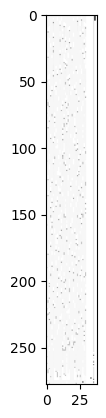

In [10]:
plt.imshow(out.detach().numpy()[0], cmap='Greys')
plt.show()

In [11]:
print(' '.join(sop_generate(prompt_tokens, vocab, sop)))

In [ ]:
print(' '.join(dpll_model.generate(prompt_tokens)))

In [ ]:
# Find the max parameter value of model
print(dpll_model)
print("Max Param:", dpll_model.find_max_parameter())

In [ ]:
dpll_model.summary()